**Dataset lnk - https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data**

In [1]:
!!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rishov0007
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense ,BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = 'new-plant-diseases-dataset/test/test'

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
class_names = validation_set.class_names
class_name_dict = {i: name for i, name in enumerate(class_names)}

print(class_name_dict)
num_classes = len(class_names)
print(num_classes)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

# **EfficientNetV2S**

---



In [8]:
from tensorflow.keras.applications import EfficientNetV2S

# Load pretrained EfficientNetV2S
pretained = EfficientNetV2S(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

EfficientNetV2S_model = Sequential([
    pretained,
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

EfficientNetV2S_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
EfficientNetV2S_model.summary()


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,506,054 (78.22 MB)

 Trainable params: 20,352,182 (77.64 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [10]:
# history_eff = train_model(EfficientNetV2S_model, 'EfficientNetV2S', train_generator, val_generator, 15)

In [11]:
history_eff = EfficientNetV2S_model.fit(x=training_set,validation_data=validation_set,epochs=15, callbacks=[early_stop])

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 995s 378ms/step - accuracy: 0.5127 - loss: 1.9134 - val_accuracy: 0.9888 - val_loss: 0.0450
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 747s 333ms/step - accuracy: 0.9669 - loss: 0.1257 - val_accuracy: 0.9925 - val_loss: 0.0324
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 779s 350ms/step - accuracy: 0.9813 - loss: 0.0749 - val_accuracy: 0.9949 - val_loss: 0.0227
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 802s 350ms/step - accuracy: 0.9875 - loss: 0.0498 - val_accuracy: 0.9961 - val_loss: 0.0186
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 801s 349ms/step - accuracy: 0.9902 - loss: 0.0402 - val_accuracy: 0.9968 - val_loss: 0.0181
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 765s 333ms/step - accuracy: 0.9927 - loss: 0.0375 - val_accuracy: 0.9958 - val_loss: 0.0161
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 730s 332ms/step - accuracy: 0.9938 - loss: 0.0296 - val_accuracy: 0.9965 - val_loss: 0.0208
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 729s 332ms/step - ac

**Train**

In [12]:
import json
history_dict = history_eff.history
accuracy_per_epoch = {
    'accuracy': history_dict['accuracy'],
    'val_accuracy': history_dict['val_accuracy']
}

with open('EfficientNetV2S_epoch.json', 'w') as json_file:
    json.dump(accuracy_per_epoch, json_file, indent=4)

**Evaluate the Model**


In [13]:
#Training set Accuracy
train_loss, train_acc = EfficientNetV2S_model.evaluate(training_set)
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 189s 86ms/step - accuracy: 0.9997 - loss: 8.8991e-04
Training accuracy: 0.9997581839561462
Training Loss: 0.000635943841189146


In [23]:
#Validation set Accuracy
val_loss, val_acc = EfficientNetV2S_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)
print('Validation Loss:', val_loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 47s 86ms/step - accuracy: 0.9988 - loss: 0.0040
Validation accuracy: 0.998349666595459
Validation Loss: 0.00848696380853653


In [ ]:
EfficientNetV2S_model.save('EfficientNetV2S_model.keras',include_optimizer='true')

In [16]:
print(history_eff.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Plotting**

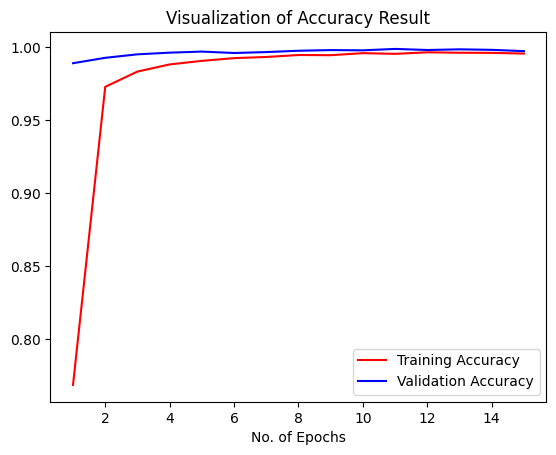

In [24]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,history_eff.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_eff.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
y_pred = EfficientNetV2S_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 192s 11ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       1.00      1.00      1.00       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.98      0.98       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___N

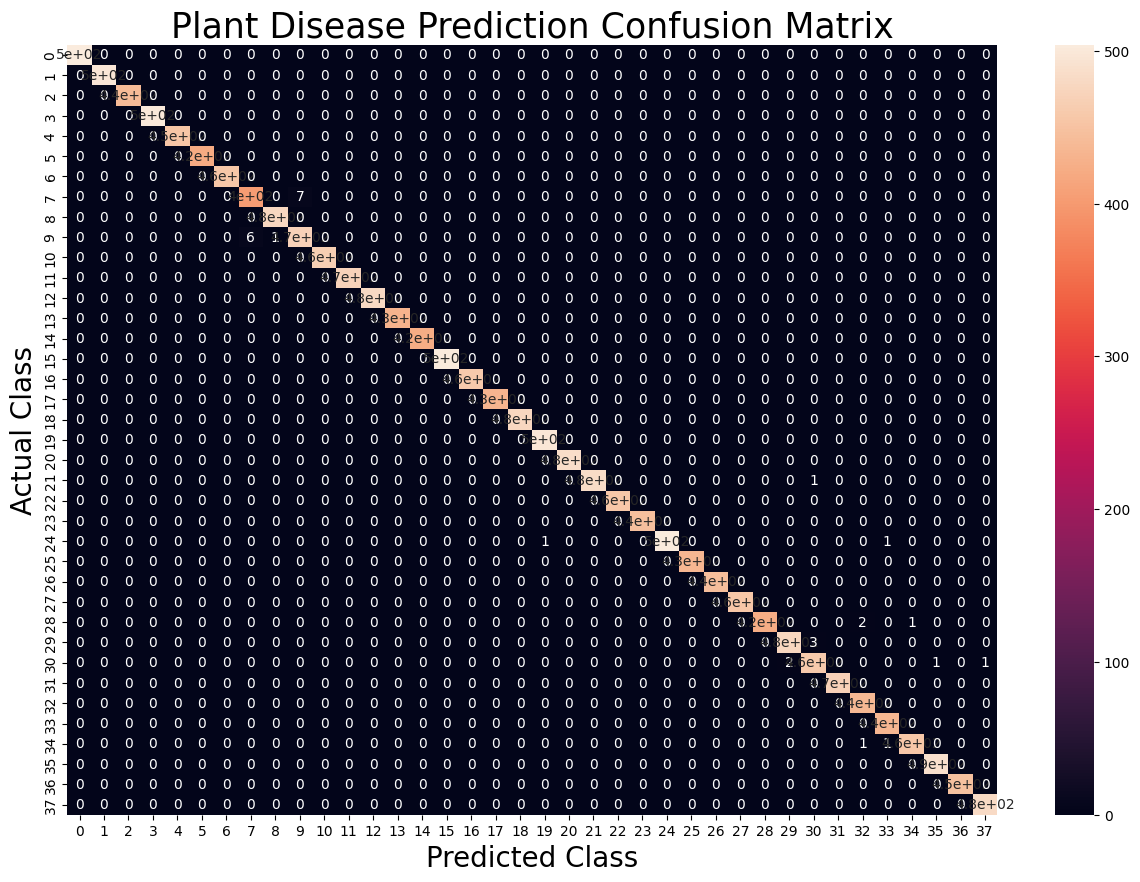

In [26]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [27]:
image_path = '/content/new-plant-diseases-dataset/test/test/PotatoHealthy2.JPG'

In [28]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch

# Make predictions
predictions = EfficientNetV2S_model.predict(input_arr)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
print(f"predicted Index - {predicted_class_index}")

# Get the predicted class name
predicted_class_name = class_name_dict[predicted_class_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
predicted Index - 22


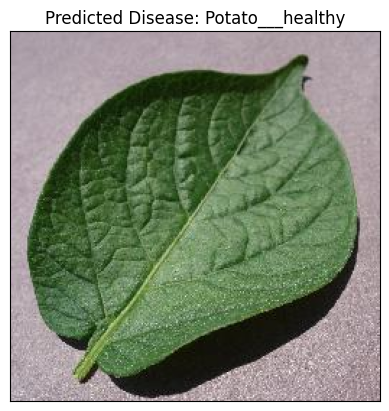

In [29]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Predicted Disease: {predicted_class_name}")
plt.xticks([])
plt.yticks([])
plt.show()